In [1]:
# example of horizontal shift image augmentation
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
from matplotlib import pyplot
from tensorflow import keras
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing import image

import tensorflow.keras.backend as K
import random


import tensorflow as tf

from PIL import Image
# import matplotlib.pyplot as plt
import numpy as np
import random


In [2]:
SIZE = 224
batch_size = 15

In [3]:
# Data augmentation generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # zoom_range=0.2,
    brightness_range=[0.88,1.0],
    # width_shift_range=0.1,
    # height_shift_range=0.1,
    # rotation_range=20)
    # zoom_range=0.2,
    horizontal_flip=True)

# Original images generator
original_datagen = ImageDataGenerator(rescale=1./255)

# Generate augmented images from the original data directory
train_generator = train_datagen.flow_from_directory(
    "../../Images/BottleStoodUp_atNight/Positive/",
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input')

# Generate original images from the original data directory
original_generator = original_datagen.flow_from_directory(
    "../../Images/BottleStoodUp_atNight/Positive/",
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input')

# Combine the generators using the `keras.preprocessing.image.Iterator` class
combined_generator = zip(train_generator, original_generator)



Found 179 images belonging to 1 classes.
Found 179 images belonging to 1 classes.


In [4]:
print(len(original_generator))
print(len(train_generator))

12
12


In [5]:
(list_batch1, list_batch2) = next(combined_generator)
# print("FOR THE AUGMENTED IMAGES")
# print(type(augmented_images_batch))
# print(len(augmented_images_batch))
# print(tf.reduce_min(augmented_images_batch), tf.reduce_max(augmented_images_batch))
# print("FOR THE ORIGINAL IMAGES")
# print(type(original_images_batch))
# print(len(original_images_batch))
# print(tf.reduce_min(original_images_batch), tf.reduce_max(original_images_batch))

In [16]:
print(type(list_batch1))

<class 'tuple'>


In [6]:
print("THe length of the list_batch1 batch is:")
print(len(list_batch1))

THe length of the list_batch1 batch is:
2


above list could be either augmented or original. It is random, the choice of which list will be retreived. 

In [7]:
print("The elemnents in the list_batch1 are of shape: ", list_batch1[0].shape, "and ", list_batch1[1].shape)

The elemnents in the list_batch1 are of shape:  (15, 224, 224, 3) and  (15, 224, 224, 3)


In [17]:
print(type(list_batch1[0]))

<class 'numpy.ndarray'>


See above the sizes are the shapes of both elements contained in the batch are the same because one correspond to the input and the other one to the target, since the geneartors were created using "input" mode, then these two will be exactly the same. 

One sample of the input of the list_batch1
(15, 224, 224, 3)


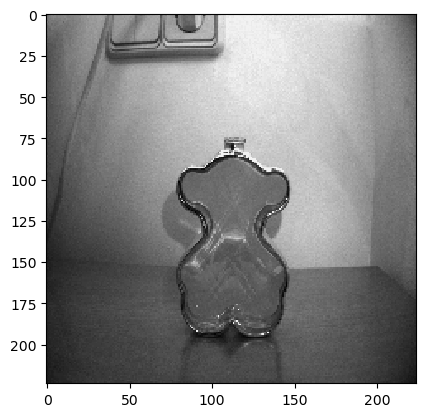

In [8]:
print("One sample of the input of the list_batch1")
input_batch = list_batch1[0]
print(input_batch.shape)
single_img = input_batch[0]
pyplot.imshow(single_img)

One sample of the target of the list_batch1
(15, 224, 224, 3)


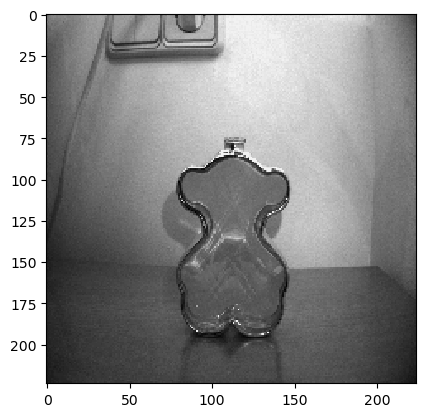

In [9]:
print("One sample of the target of the list_batch1")
target_batch = list_batch1[1]
print(target_batch.shape)
single_img2 = target_batch[0]
pyplot.imshow(single_img2)

In [10]:
single_img2 == single_img

array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       ...,

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,

as seen above, in this particular example, the list_batch1 is of augmented images. Hence the list_batch2 is supposed to be of original images. Let's see

In [11]:
print("The elemnents in the list_batch2 are of shape: ", list_batch2[0].shape, "and ", list_batch2[1].shape)

The elemnents in the list_batch2 are of shape:  (15, 224, 224, 3) and  (15, 224, 224, 3)


One sample of the input of the list_batch2
(15, 224, 224, 3)


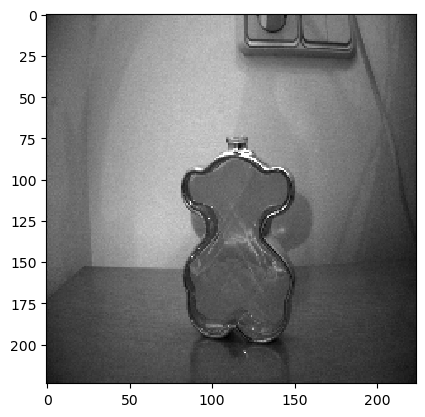

In [12]:
print("One sample of the input of the list_batch2")
input_batch = list_batch2[0]
print(input_batch.shape)
single_img = input_batch[0]
pyplot.imshow(single_img)

One sample of the target of the list_batch2
(15, 224, 224, 3)


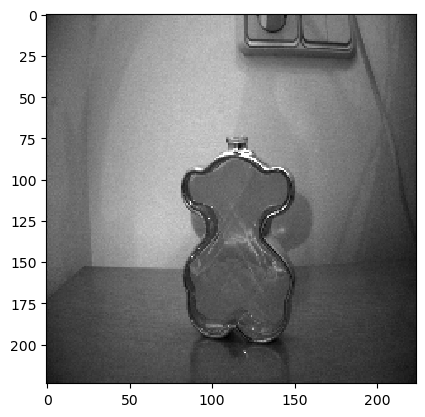

In [13]:
print("One sample of the target of the list_batch2")
target_batch = list_batch2[1]
print(target_batch.shape)
single_img2 = target_batch[0]
pyplot.imshow(single_img2)

In [14]:
single_img2 == single_img

array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       ...,

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,

Showing multiple augmented images

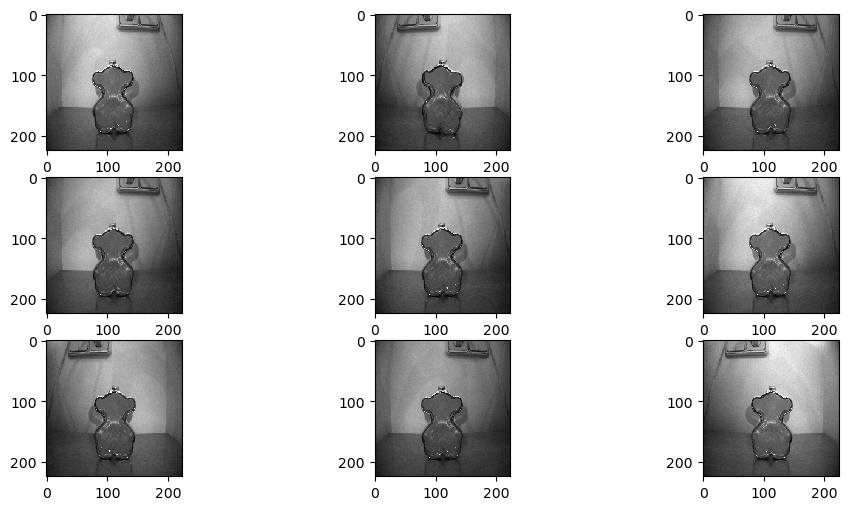

In [15]:
pyplot.figure(figsize=(12, 6))
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	(augmented_images_batch, _) = next(combined_generator)
	input_batch_augmented = augmented_images_batch[0]
	single_img = input_batch_augmented[0]
	# plot raw pixel data
	pyplot.imshow(single_img)
# show the figure
pyplot.show()